In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import resample

In [71]:
df = pd.read_csv('water_potability.csv')

In [72]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [73]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [74]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [75]:
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

C:\Users\101\AppData\Local\Temp\ipykernel_13776\2876935244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)
C:\Users\101\AppData\Local\Temp\ipykernel_13776\2876935244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

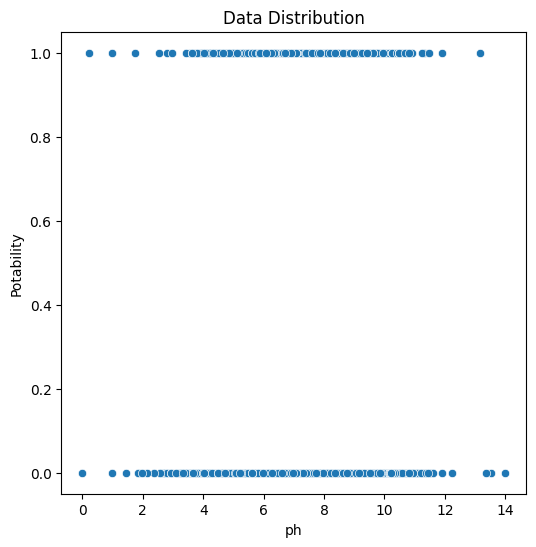

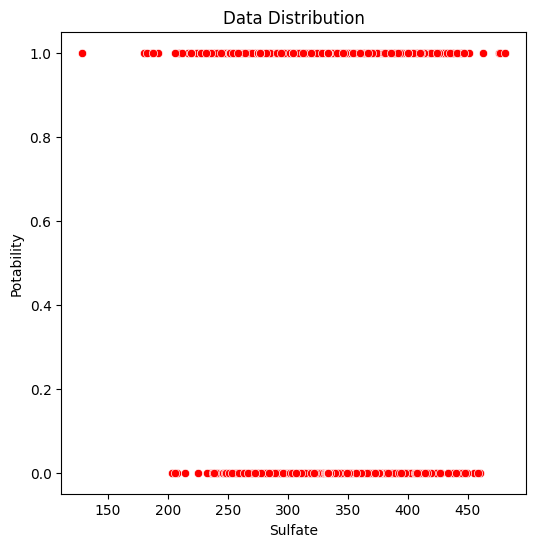

In [76]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'ph', y = 'Potability', data = df)
plt.title("Data Distribution")
plt.xlabel('ph')
plt.ylabel('Potability')
plt.grid(False)
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'Sulfate', y = 'Potability', data = df, color = 'red')
plt.title("Data Distribution")
plt.xlabel('Sulfate')
plt.ylabel('Potability')
plt.grid(False)
plt.show()

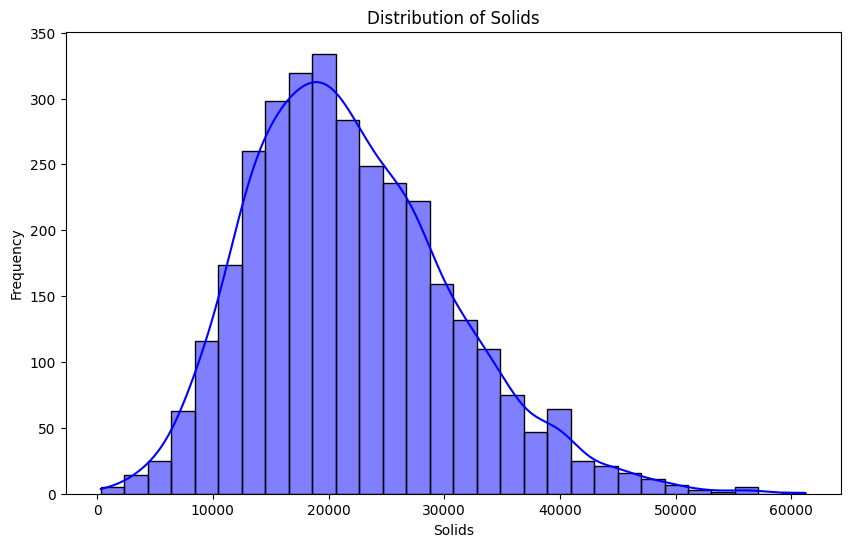

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Solids'], bins=30, kde=True, color='blue')
plt.title('Distribution of Solids')
plt.xlabel('Solids')
plt.ylabel('Frequency')
plt.show()

In [78]:
df_mij = df[df.Potability==0]
df_min = df[df.Potability==1]
df_min_up = resample(df_min, replace=True, n_samples=len(df_mij), random_state=0)
df_up = pd.concat([df_mij, df_min_up])
X = df_up.drop(columns='Potability')
y = df_up['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [79]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ph                 0.130080
Sulfate            0.126475
Hardness           0.120752
Solids             0.114789
Chloramines        0.113325
Conductivity       0.101804
Organic_carbon     0.099875
Turbidity          0.097388
Trihalomethanes    0.095512
dtype: float64

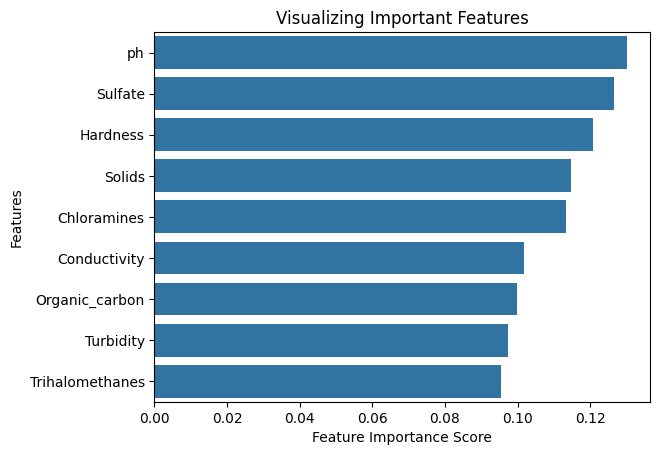

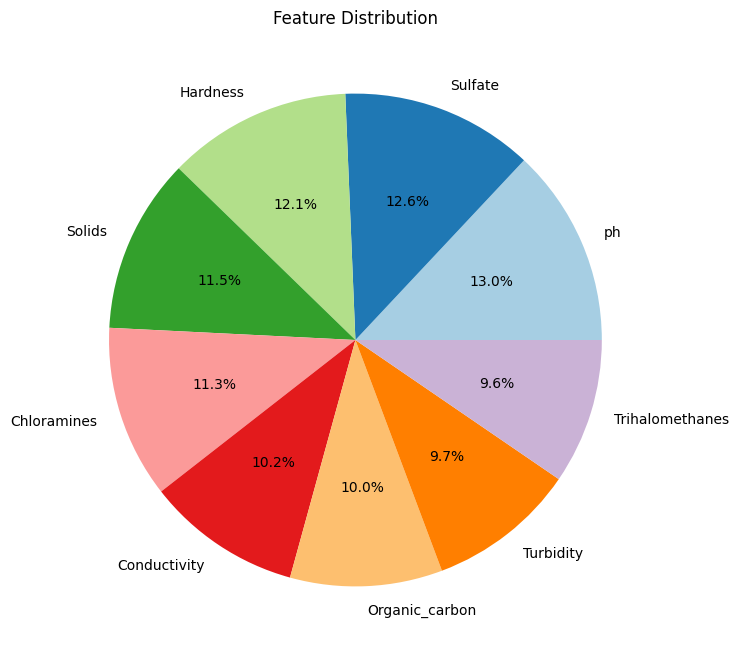

In [81]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

#day_counts = tips['day'].value_counts()

# Pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(feature_scores, labels=feature_scores.index, autopct='%.1f%%', colors=plt.cm.Paired(range(len(feature_scores))))
plt.title('Feature Distribution')
plt.show()


In [82]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       407
           1       0.84      0.85      0.84       393

    accuracy                           0.84       800
   macro avg       0.84      0.85      0.84       800
weighted avg       0.85      0.84      0.85       800



In [83]:
cvs = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(cvs)
print(cvs.mean())
print(cvs.std())

[0.796875   0.80438185 0.78090767 0.83568075 0.76056338]
0.7956817292644758
0.025014431857191457


In [84]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)
print("Test Score:", test_score)
print("Best Model:", best_model)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8047530320813772
Test Score: 0.84125
Best Model: RandomForestClassifier(n_estimators=200, random_state=42)
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       407
           1       0.83      0.85      0.84       393

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



In [85]:
df_mij = df[df.Potability==0]
df_min = df[df.Potability==1]
df_min_up = resample(df_min, replace=True, n_samples=len(df_mij), random_state=0)
df_up = pd.concat([df_mij, df_min_up])
X = df_up.drop(columns='Potability')
y = df_up['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [87]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       407
           1       0.49      0.50      0.50       393

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



In [88]:
base_models = [
    ('rf', model),
    ('gb', svm)
]

meta_model = LogisticRegression(random_state=42)

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Number of folds for cross-validation
)

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'gb__gamma': [0.001, 0.01, 0.1],
    'gb__C': [0.1, 1, 10],
}


grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_stacking_model = grid_search.best_estimator_

y_pred = best_stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [89]:
print(accuracy)
print(report)
print(conf_matrix)
print(best_stacking_model)

0.86
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       407
           1       0.87      0.84      0.85       393

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800

[[359  48]
 [ 64 329]]
StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('gb',
                                SVC(C=0.1, gamma=0.001, kernel='sigmoid'))],
                   final_estimator=LogisticRegression(random_state=42))


# Deployment

In [90]:
import joblib
file='ai'
joblib.dump(model, "ai")
model = joblib.load(open("ai", "rb"))